In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
# paths
data_path = "../output/ip_weighted_sources"
wave_files = ["w6.csv", "w8.csv", "w10.csv", "w12.csv", "w14.csv", "w16.csv"]
data_path_results = "../output/results"
data_all_imputed = "../data/data_all_impute.csv"
dem_info = "../data/COVID_Demographic_Summary_v2.xlsx"
#ori_ori = "../data/Wave1-18_A-N_release.csv"

In [120]:
ori_ori_df = pd.read_csv(ori_ori, low_memory=False)

In [121]:
ori_ori_df.head()

V1                    V2            V3            V4 V5  \
0  R_2ROqxMOS20VJuQI  Default Response Set  4/5/20 10:40  4/5/20 11:24  1   
1  R_3qPaGJOZNgMHEYz  Default Response Set  4/5/20 10:51  4/5/20 11:41  1   
2  R_3GjGPWLHGDG7lkE  Default Response Set  4/5/20 10:52  4/5/20 11:49  1   
3  R_3eaj9TJfmhq1FLs  Default Response Set  4/5/20 10:49  4/5/20 11:53  1   
4  R_2Yh84GpehIS1WFU  Default Response Set  4/5/20 10:56  4/5/20 11:55  1   

               PROLIFIC_PID    TASK1    TASK2    TASK3    TASK4  ...  \
0  5df82e8739bcde5dd044f741  cvd_pgg  pro_iat  cvd_amp    tr_1s  ...   
1  5c7e91c1973c990016ea72b0  cvd_amp  cvd_pgg  pro_iat    tr_1s  ...   
2  5e753094e8a6f10a9805ed9a  cvd_pgg    tr_1s  cvd_amp  pro_iat  ...   
3  5e67052c757e6149c38ce468  cvd_amp  pro_iat    tr_1s  cvd_pgg  ...   
4  5e7745990fd39b2a816ec341  cvd_amp  cvd_pgg    tr_1s  pro_iat  ...   

  tr_1s_administered  iat_administered pgg_administered amp_administered  \
0               True              True             True             True   
1               True              True             True             True   
2               True              True             True             True   
3               True              True             True             True   
4               True              True             True             True   

  cvd_consp_administered nCompleted perc_completed low_compl  \
0                  False        3.0       0.166667      True   
1                  False       18.0       1.000000     False   
2                  False       17.0       0.944444     False   
3                  False        9.0       0.500000     False   
4                  False        4.0       0.222222      True   

  perc_valid_failed N_valid_failed  
0          0.272727            3.0  
1          0.000000            0.0  
2          0.000000            0.0  
3          0.000000            0.0  
4          0.181818            2.0  

[5 rows x 4080 columns]

In [102]:
dem_info_df = pd.read_excel(dem_info, index_col=0)

In [106]:
core_samples = dem_info_df.loc[dem_info_df['Sample']=='PC', 'Participant_ID'].values

In [109]:
len(core_samples)

1177

In [107]:
core_samples

array(['546ec14dfdf99b2bc7ebd032', '546ee363fdf99b2bc7ebd035',
       '54847013fdf99b0379939c8a', ..., '5e86543a53859c0cad6cfcaa',
       '5e865ed591a08928b8616e62', '5e867394499bf02a03897f0a'],
      dtype=object)

In [89]:
ori_dat = pd.read_csv(data_all_imputed, index_col=0)

/home/andy/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (196,208,212,216,223,243,264,268,270,271,290,297,305,343,362,369,379,542,706,723,724,725,726,727,728,729,730,731,732,733,734,766,768) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [90]:
ori_dat_w1 = ori_dat.loc[ori_dat['wave']==1]

In [92]:
ori_dat_w1['States']

0          California
3          California
19         California
28         California
44         California
             ...     
18424         Vermont
18440         Vermont
18447    North Dakota
18466         Wyoming
18477    South Dakota
Name: States, Length: 1797, dtype: object

In [47]:
data = pd.read_csv(os.path.join(data_path, wave_files[0]))
data

PROLIFIC_PID  Gender  Education  Income  Political_Views  \
0     5c7e91c1973c990016ea72b0   False        5.0     1.0              1.0   
1     5e753094e8a6f10a9805ed9a   False        5.0     3.0              1.0   
2     5e67052c757e6149c38ce468    True        1.0     1.0              4.0   
3     5d89106d1719af0001ee23e5   False        2.0     1.0              6.0   
4     5dc5bd296a8a334443fbf216   False        3.0     1.0              4.0   
...                        ...     ...        ...     ...              ...   
1162  5d14f01dcd4b9c000184627b   False        5.0     2.0              6.0   
1163  5b5e7e643bac1d0001f9bf28   False        7.0     1.0              1.0   
1164  5d56123417ee8d0001cd9e00    True        6.0     4.0              2.0   
1165  5d8e3cd58c996a00138f684c    True        5.0     5.0              5.0   
1166  5d7e7a080cc1c900155d5d07    True        5.0     5.0              5.0   

       Age  Race  Depression  Stress  Anxiety  ...  Race_W  low_quality  \
0     55.0   5.0          16      29       40  ...    True        False   
1     64.0   5.0           3       9       32  ...    True        False   
2     23.0   7.0          51      22       71  ...   False        False   
3     47.0   5.0           0       6       29  ...    True        False   
4     48.0   5.0           2      26       22  ...    True        False   
...    ...   ...         ...     ...      ...  ...     ...          ...   
1162  72.0   5.0           4      14       42  ...    True        False   
1163  32.0   6.0          23      24       42  ...   False        False   
1164  72.0   5.0           0       5       27  ...    True        False   
1165  38.0   5.0           0       1       21  ...    True        False   
1166  35.0   5.0           1       1       22  ...    True        False   

      Income^2   Age^2  Education^2  low_quality_w  dropout  dropout_w  \
0          1.0  3025.0         25.0       0.995227    False   0.745786   
1          9.0  4096.0         25.0       0.999702    False   0.786465   
2          1.0   529.0          1.0       0.985936    False   0.530834   
3          1.0  2209.0          4.0       0.983641    False   0.698059   
4          1.0  2304.0          9.0       0.985962    False   0.704191   
...        ...     ...          ...            ...      ...        ...   
1162       4.0  5184.0         25.0       0.999963    False   0.818684   
1163       1.0  1024.0         49.0       0.993979    False   0.611101   
1164      16.0  5184.0         36.0       0.999889    False   0.839724   
1165      25.0  1444.0         25.0       0.989053    False   0.667970   
1166      25.0  1225.0         25.0       0.988075    False   0.649704   

       total_w  Depression_adj  
0     0.742226       21.556766  
1     0.786231        3.815671  
2     0.523368       97.445734  
3     0.686639        0.000000  
4     0.694306        2.880576  
...        ...             ...  
1162  0.818654        4.886066  
1163  0.607422       37.864936  
1164  0.839631        0.000000  
1165  0.660657        0.000000  
1166  0.641956        1.557738  

[1167 rows x 39 columns]

In [37]:
all_dat = []
for w in wave_files:
    data = pd.read_csv(os.path.join(data_path, w))
    all_dat.append(data)

In [38]:
a = np.zeros(2)

In [69]:
def get_trajectory(var, pid):
    n_waves = len(all_dat)
    values = np.zeros(len(all_dat))
    for i in range(n_waves):
        tmp = all_dat[i].loc[all_dat[i]['PROLIFIC_PID']==pid, var]
        if np.size(tmp) == 0:
            values[i] = np.nan
        else:
            values[i] = all_dat[i].loc[all_dat[i]['PROLIFIC_PID']==pid, var]
    return values

In [97]:
random_ids = all_dat[0]['PROLIFIC_PID'].sample(30).values

array(['1', '1', '1', ..., '18', '18', '18'], dtype=object)

In [126]:
ori_ori_df.loc[(ori_ori_df['wave']=='6') & (ori_ori_df['PROLIFIC_PID']=='546ec14dfdf99b2bc7ebd032'), 'BDI_total_raw']

7430    0.0
Name: BDI_total_raw, dtype: float64

In [134]:
ori_ori_df.loc[(ori_ori_df['wave']=='16') & (ori_ori_df['PROLIFIC_PID']=='546ec14dfdf99b2bc7ebd032'), 'BDI1':'BDI20']

BDI1  BDI2  BDI3  BDI4  BDI5  BDI6  BDI7  BDI8  BDI9  BDI10  BDI11  \
19122   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0    1.0    1.0   

       BDI12  BDI13  BDI14  BDI15  BDI16  BDI17  BDI18  BDI19  BDI20  
19122    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0

In [108]:
for i in core_samples:
    print('=========' + i + '=========')
    print(ori_dat_w1.loc[ori_dat_w1['PROLIFIC_PID']==i, 'States'].values)
    print(get_trajectory('Mandatory_SAH', i))
    print(get_trajectory('Depression_adj', i))

=========546ec14dfdf99b2bc7ebd032=========
['California']
[1. 1. 1. 1. 1. 1.]
[0.         2.91366835 0.         0.         0.         0.        ]
=========546ee363fdf99b2bc7ebd035=========
['California']
[1. 1. 1. 1. 1. 1.]
[1.29110668 1.31420974 1.38696147 0.         2.98698947 1.52467889]
=========54847013fdf99b0379939c8a=========
['Michigan']
[1. 0. 0. 0. 0. 0.]
[18.89407993 16.96694133 20.84968421 22.25669764 18.1893007  28.95840091]
=========54847f1cfdf99b07b28f22f9=========
['Missouri']
[ 0.  0.  0.  0. nan  0.]
[0.        0.        0.        0.              nan 1.5587255]
=========54849236fdf99b07b28f2318=========
['Kansas']
[ 0.  0.  0. nan nan nan]
[17.67057554 32.51047679 28.66903767         nan         nan         nan]
=========54924b8efdf99b77ccedc1d5=========
['California']
[ 1. nan  1.  1.  1. nan]
[29.31292439         nan 46.44740894 43.5091905  43.53271468         nan]
=========549ea92efdf99b4ffa5fa208=========
['Michigan']
[nan  0.  0. nan  0.  0.]
[        nan 34.6259

[18.00446834 18.6203286          nan 37.67279598 32.93839435 24.40174038]
=========576787093c6f2e0001bd472e=========
['Kansas']
[nan nan  0.  0. nan  0.]
[       nan        nan 8.04664031 9.54119124        nan 1.44411033]
=========576b0cef7f3abb0001fe94f1=========
['Florida']
[ 0.  0. nan  0.  0.  0.]
[6.85653378 5.95079837        nan 9.70834689 9.87533707 7.89292157]
=========5781c15381f331000139a89e=========
['Texas']
[nan  0. nan  0. nan  0.]
[        nan 78.13092731         nan 84.9243359          nan 97.83930266]
=========578ba9442fc0d400012c71dc=========
['California']
[1. 1. 1. 1. 1. 1.]
[ 9.01393437  9.03764635  4.73096534  5.73173592  0.         12.66086576]
=========579e09bd4d107800016dd938=========
['California']
[ 1.  1.  1.  1.  1. nan]
[ 0.  0.  0.  0.  0. nan]
=========579e1e2b275be6000135af15=========
['Indiana']
[0. 0. 0. 0. 0. 0.]
[38.87774621 43.41909263 39.77856115 52.67370027 53.35521291 54.37812124]
=========57b60487e5b60d0001083aea=========
['Washington']
[nan  0

[1. 1. 1. 1. 1. 1.]
[ 5.93039248 10.40485012 13.07648023  5.35893193  6.97466426  3.64597108]
=========599ec7dc617ca80001fcd124=========
['Massachusetts']
[0. 0. 0. 0. 1. 1.]
[16.82778793 14.34120114 12.91223744 11.70267459 13.44214919 11.56237021]
=========59acabcd8a929800014ad8db=========
['Nevada']
[0. 0. 0. 0. 0. 0.]
[ 8.42268688  9.04387589 11.24165336  8.13849218  3.21799125 13.47042639]
=========59ba2a6e6495ef00019fbd70=========
['Massachusetts']
[ 0.  0.  0.  0.  1. nan]
[10.75186631  8.49076441  6.04319025  5.97796073  6.02790748         nan]
=========59c0782e5364260001dc4740=========
['Mississippi']
[0. 0. 0. 0. 0. 0.]
[5.7916467  2.40332798 7.86551882 7.37790402 6.82681578 6.74197424]
=========59c0a297c458e800017b5499=========
['Washington']
[1. 0. 0. 0. 0. 0.]
[ 9.71803311 11.63512185 17.21509746 15.61936406  7.72561824 11.31870517]
=========59c843b646f72100019067ce=========
['Texas']
[0. 0. 0. 0. 0. 0.]
[16.64477702 24.87993222 25.31048325 17.71568521 27.10327808 23.836165

[nan  0. nan  0.  0.  0.]
[        nan 30.75131889         nan 48.58779608 45.38862053 59.00288752]
=========5aa637861eda41000136d5d2=========
['Georgia']
[0. 0. 0. 0. 0. 0.]
[28.15623212 45.26502201 49.71925033 63.46238278 57.05473894 58.65313956]
=========5aa6c4a4b5e2110001c73f69=========
['Texas']
[ 0.  0.  0. nan nan nan]
[48.34039136 73.18040648 85.68948981         nan         nan         nan]
=========5aadbe52811b2000016f7633=========
['Massachusetts']
[0. 0. 0. 0. 1. 1.]
[11.87110688 16.39224029  7.65136877 12.05652788 12.55198624  7.62367519]
=========5aaeb037811b2000016f7e9f=========
['California']
[ 1.  1. nan nan nan nan]
[ 0.  0. nan nan nan nan]
=========5ac015efe1099600016a5d17=========
['New York']
[nan  0.  0.  0. nan nan]
[        nan 29.89209801 42.64991818 35.87257542         nan         nan]
=========5ac2b4889534ba0001c72843=========
['Michigan']
[ 1. nan nan  0. nan nan]
[25.74304643         nan         nan  0.                 nan         nan]
=========5ac47e09f69e

['New York']
[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
=========5b707a406f0ed10001bfb973=========
['New York']
[ 1.  0.  0. nan  0.  0.]
[31.18276181  1.60023368  3.53542159         nan  0.         29.92294137]
=========5b745fb794c93d00010fc4c6=========
['Oregon']
[1. 1. 1. 1. 1. 1.]
[40.09842281 42.38126647 48.57098601 41.39852271 41.88975275 36.35590804]
=========5b7ca6161e35f0000172fa14=========
['Maryland']
[0. 0. 0. 0. 0. 0.]
[12.85056571 21.32455823 27.70886531  8.00866276  7.88358913  2.12447175]
=========5b7e118e87d85f0001baac27=========
['Ohio']
[ 1.  0.  0.  0. nan  1.]
[12.72227769  6.52041827 19.15047259 10.9021688          nan  7.59388118]
=========5b7fa64787d85f0001baf4fa=========
['Hawaii']
[ 1.  0.  0. nan nan nan]
[44.23886374 54.69945465  7.27693357         nan         nan         nan]
=========5b846b48338a930001566887=========
['California']
[1. 1. 1. 1. 1. 1.]
[16.27655102 12.77751502 24.31328842 19.86203125 21.22151204  1.44027814]
=========5b8f08cbb007ed0001aaa0bd==

=========5c0262307e7bca000123e41b=========
['Texas']
[nan  0.  0.  0.  0.  0.]
[        nan 27.32414244 20.64312276 20.67971622 21.83057337 17.40528422]
=========5c03c70729abc00001992bf1=========
['New York']
[1. 0. 0. 0. 0. 0.]
[ 3.23309795  8.90414288 13.09960953  9.9675404  11.75743995 10.51558535]
=========5c054e8a553fb800011917d7=========
['Alaska']
[0. 0. 0. 0. 0. 0.]
[16.62755781 28.85934605 33.56581782 25.90001405 25.16144384 51.4714671 ]
=========5c0727ff1d461400012b61ee=========
['Massachusetts']
[ 0.  0. nan  0. nan  1.]
[36.20981212 32.07942725         nan 40.51339288         nan 56.01622947]
=========5c0795f64452300001df3304=========
['California']
[ 1.  1.  1. nan  1. nan]
[16.86602242 23.62638676 31.70851987         nan 15.39600379         nan]
=========5c0c458f07028b0001f6f685=========
['California']
[1. 1. 1. 1. 1. 1.]
[31.78510537 19.39424198 12.1808872   9.59894615  8.81436417 24.12078947]
=========5c0f500787e876000151fc5f=========
['Maine']
[1. 0. 0. 0. 0. 0.]
[15.0

[0.         7.24913658 2.08335386 2.41084525 4.88617652 7.86645924]
=========5c3a87a61ede2b000115cf76=========
['New Mexico']
[1. 0. 0. 0. 0. 1.]
[5.63065946 5.8434905  6.32696819 3.22962545 6.29776204 6.56555671]
=========5c3d4b92486a390001e87dfe=========
['California']
[1. 1. 1. 1. 1. 1.]
[ 2.4966297   2.52266844  3.95168481  5.11807704  5.76080034 15.58494094]
=========5c3e82e91580e9000122d204=========
['Ohio']
[1. 0. 0. 0. 0. 1.]
[1.55125682 4.91900764 1.64674305 0.         2.05729149 0.        ]
=========5c3fb71b36052e00016bb1a6=========
['Washington']
[ 1.  0.  0. nan  0.  0.]
[32.97450825 24.81581495 20.87843405         nan 25.03313916  9.70902325]
=========5c3fd0d4c2d0b700017d02cd=========
['Oregon']
[ 1.  1.  1.  1.  1. nan]
[21.77732102 16.69790877 11.36303679 24.70603571 28.92229953         nan]
=========5c41c28e896e090001c03bb0=========
['Pennsylvania']
[nan  0. nan nan  0. nan]
[        nan 16.37244123         nan         nan 17.14313321         nan]
=========5c43c90d5aca8

[45.78209997 44.4022902  29.61263114 47.15191243 54.47435837 59.11354603]
=========5c9107147a7067000190a544=========
['South Carolina']
[ 0.  0.  0. nan nan nan]
[1.42509961 5.83780961 1.61833358        nan        nan        nan]
=========5c91c693765dad0016f8495c=========
['Tennessee']
[0. 0. 0. 0. 0. 0.]
[ 9.05055139 18.19192083  4.74605572 12.67067003  6.70712778  3.44218065]
=========5c91fc9c183fb70012f3510a=========
['Washington']
[1. 0. 0. 0. 0. 0.]
[43.7705009  47.80886249 67.60141458 64.85694714 65.39237625 61.54703223]
=========5c925b0fb138fe0014e4036b=========
['Georgia']
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
=========5c926d2a0ae1ea00156f71a0=========
['Tennessee']
[0. 0. 0. 0. 0. 0.]
[ 2.50671215  6.27741393  3.94777589  9.13283424 17.21589683  2.85531375]
=========5c9293accd8dd00001d0b129=========
['California']
[1. 1. 1. 1. 1. 1.]
[10.76235285  9.66128876  7.29533039  7.27933025 12.18538707  9.1074707 ]
=========5c92cda483617d0010bef1b8=========
['Virginia']
[1. 0. 0. 0. 

[ 0. nan  0. nan nan nan]
[20.58314629         nan 23.72121194         nan         nan         nan]
=========5d100e740277ff00152f7562=========
['Oregon']
[1. 1. 1. 1. 1. 1.]
[10.35878657  5.97225806  6.49724833 11.91894149 13.51130149 21.44059682]
=========5d10eaf23afd390019075267=========
['New Jersey']
[nan  0.  0.  0.  0.  1.]
[        nan 24.31159127 40.01044953 41.31439745 22.33372119 29.02162021]
=========5d118de2c80b57001721f93e=========
['New York']
[ 1. nan nan nan nan nan]
[ 0. nan nan nan nan nan]
=========5d130227a271e4001a743702=========
['California']
[nan nan nan  1.  1.  1.]
[        nan         nan         nan 39.11844796 54.30164795 30.59679685]
=========5d14445a4e1adb0001bff411=========
['Massachusetts']
[ 0.  0.  0. nan nan nan]
[8.29525282 8.66236412 3.77342039        nan        nan        nan]
=========5d14c08b63f5660018e9c499=========
['Florida']
[0. 0. 0. 0. 0. 0.]
[23.9280992  21.94264322 25.82648558 23.76639441 20.26315242 25.48466117]
=========5d14f01dcd4b9c0

[13.84192637 10.75143104 14.0035136   9.14528256 16.28325723  6.41330045]
=========5d47abcc2dc88900166f27c9=========
['California']
[1. 1. 1. 1. 1. 1.]
[16.49664082 11.67966372 17.55415904 15.9599184  19.11327742  8.46240803]
=========5d48b029c4b12b00194b5aa5=========
['Texas']
[0. 0. 0. 0. 0. 0.]
[ 0.          1.294791    0.         12.19698944 19.42345302 19.05407915]
=========5d48fcc5643eb80001fb43fa=========
['Massachusetts']
[0. 0. 0. 0. 1. 1.]
[26.73562633 23.3558612  23.29841449 39.91749215 33.74642377 15.70625563]
=========5d49a0b751695e0001a188a8=========
['New Jersey']
[1. 0. 0. 0. 0. 0.]
[5.07487117 1.25141625 2.63607111 0.         5.81076693 0.        ]
=========5d49e0a96f4b310001c124bf=========
['Colorado']
[0. 0. 0. 0. 0. 1.]
[50.39479407 30.03002054 35.16961288 29.08187813 28.35066312 33.37254197]
=========5d49f195061e2a000138b69f=========
['California']
[ 1.  1. nan nan nan nan]
[55.14134539 44.83780198         nan         nan         nan         nan]
=========5d4a1c61b

[ 0. nan nan  0.  0.  0.]
[1.55773838        nan        nan 0.         0.         0.        ]
=========5d80634181aa40001819e755=========
['Nevada']
[ 0. nan  0. nan  0.  0.]
[37.3432024          nan 40.85736494         nan 28.8725811  26.08932685]
=========5d8076e9fdae37001cc20d6e=========
['California']
[ 1.  1. nan  1. nan  1.]
[ 1.72770124 12.3079484          nan 29.43648034         nan 17.04662648]
=========5d82be0cf45ead000150f026=========
['West Virginia']
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
=========5d82d28977546f00166ae702=========
['Indiana']
[0. 0. 0. 0. 0. 0.]
[14.97572993 11.60668338  5.23899965  6.77676389 12.86030097 15.66433747]
=========5d83d2f1ae7a8b00017ec6a9=========
['Massachusetts']
[nan nan nan  0.  1.  1.]
[        nan         nan         nan  9.97275564 15.63622948 32.85850732]
=========5d86d05f9854a60019240621=========
['Louisiana']
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
=========5d87e122e951a10001c3811a=========
['California']
[ 1.  1.  1. nan nan  1.]
[0

[ 1.24243486 12.11365689 13.76475395 15.95687159 16.36616205 15.25089061]
=========5dc50289718e6d39756e99f9=========
['Arizona']
[0. 0. 0. 0. 0. 0.]
[0.         2.6577702  4.04405467 2.91000769 3.00217776 1.49342716]
=========5dc59aea37023940a0860dea=========
['Pennsylvania']
[0. 0. 0. 0. 0. 0.]
[13.48781044 11.40617887 13.62589376 20.39459178 17.11286366 15.96733903]
=========5dc5bd296a8a334443fbf216=========
['Washington']
[ 1.  0.  0. nan nan  0.]
[ 2.88057554 40.07842596 32.70795342         nan         nan  8.33969189]
=========5dc8d871031ed662f4e63291=========
['New Mexico']
[nan  0.  0.  0. nan nan]
[nan  0.  0.  0. nan nan]
=========5dc8d8b90a0b38630af7a0ba=========
['New Mexico']
[1. 0. 0. 0. 0. 1.]
[13.70974177 10.17943716  5.33324681  5.2776133   1.46482731  0.        ]
=========5dc9a379d210e46baff956fb=========
['Illinois']
[nan nan  0.  0. nan nan]
[        nan         nan 89.70807586 71.43146575         nan         nan]
=========5dc9afa52b1e546c412adfba=========
['Washingt

[0. 0. 0. 0. 0. 0.]
[5.11542818 3.8669083  2.73042189 6.79743078 2.9044991  4.46445317]
=========5ddbd6e518beb6b1e1de0326=========
['Missouri']
[0. 0. 0. 0. 0. 0.]
[ 8.41944519  6.23880125 13.18900323  1.30238279 18.30670021 13.09971669]
=========5ddbdd54f30aa6b365b4ebab=========
['Florida']
[ 0.  0. nan  0.  0.  0.]
[14.67226542 27.35842472         nan 11.82523001  6.72821081  6.94322262]
=========5ddcc7783c4937c326932594=========
['California']
[ 1. nan  1. nan nan nan]
[1.41925089        nan 0.                nan        nan        nan]
=========5ddcd77f23f9f1c2c45d6c18=========
['Florida']
[ 0.  0.  0.  0. nan nan]
[0.         0.         1.39048546 2.74970382        nan        nan]
=========5dde21012a30acd8ada645ec=========
['Florida']
[ 0. nan nan nan  0.  0.]
[24.45810255         nan         nan         nan 20.05980907 24.90025979]
=========5ddef0fae454cde6bc7d9e3e=========
['Florida']
[ 0. nan nan nan  0.  0.]
[ 9.01139931         nan         nan         nan 14.03449516  9.481878

[0. 0. 0. 0. 0. 0.]
[2.63337063 2.74843044 4.29346667 1.38501154 5.82774474 1.49683696]
=========5dfa56fddc265f7ac3bee209=========
['Missouri']
[0. 0. 0. 0. 0. 0.]
[1.42908973 1.42708306 0.         0.         3.47485115 1.75674387]
=========5dfb87ac265c808aeb82de9a=========
['Virginia']
[nan  0.  0. nan nan nan]
[       nan 8.86115328 4.62313284        nan        nan        nan]
=========5dfbc3a1946e978e69d8e586=========
['Arizona']
[0. 0. 0. 0. 0. 0.]
[1.23760004 1.2479489  0.         2.57794647 0.         0.        ]
=========5dfbc3d9d62abe8e853f2a09=========
['Iowa']
[nan nan nan  0. nan  0.]
[        nan         nan         nan 23.22853023         nan 29.66478124]
=========5dfc674a9195c6974e597c58=========
['North Carolina']
[ 0.  0.  0.  0.  0. nan]
[67.14340666 34.09822977 50.5387741  66.02163611 54.229657           nan]
=========5dfc840a265c8097a1e85473=========
['Hawaii']
[ 1.  0.  0.  0.  0. nan]
[24.51093788 23.61026461 11.31192455 28.77697983 37.03123932         nan]
=======

[ 81.68537409 110.8203497  121.85057152 163.031594   184.82461972
 226.73793847]
=========5e27fb1a28b7b6a0715e6991=========
['California']
[ 1.  1.  1.  1. nan nan]
[26.15619166  9.67623683 28.03485486 12.95639592         nan         nan]
=========5e2897fd0351e803a40629a5=========
['Florida']
[0. 0. 0. 0. 0. 0.]
[25.58553736 50.71426537 31.24699491 41.66035346 22.43751855 37.68319217]
=========5e289d54a06ebe0464cfbe58=========
['Tennessee']
[ 0. nan  0. nan  0. nan]
[34.19645231         nan 48.19626477         nan 35.32528624         nan]
=========5e2926d80beb030ede110e67=========
['Arizona']
[0. 0. 0. 0. 0. 0.]
[ 0.          5.38067827  4.37634415  7.36548601  4.63241646 15.52555159]
=========5e29c3e725dcfd01cef9f474=========
['Mississippi']
[nan  0.  0.  0.  0.  0.]
[      nan 4.3846972 0.        0.        0.        0.       ]
=========5e29ed78eb557a05536b8442=========
['Virginia']
[1. 0. 0. 0. 0. 0.]
[15.12045586 17.18276455 22.59730422 14.64247107  9.01034018 14.59534183]
=========

['Illinois']
[1. 0. 0. 0. 0. 0.]
[40.67016445 29.20241712 36.75898768 56.65690319 44.44584182 51.19227555]
=========5e52d0122f5f952f2a7b6b28=========
['Wisconsin']
[0. 0. 0. 0. 0. 0.]
[49.88519556 50.66595729 60.72281278 61.08039956 55.28828609 69.91240116]
=========5e5323c8c9f6063449ad9f00=========
['California']
[ 1.  1.  1.  1.  1. nan]
[49.65742082 60.50542348 57.49153881 63.3878521  88.84524123         nan]
=========5e53556d2d48ca364723bf10=========
['California']
[ 1.  1. nan nan nan nan]
[21.7883281  13.66275495         nan         nan         nan         nan]
=========5e53950380aa2c3958b44923=========
['California']
[ 1.  1. nan nan nan  1.]
[5.35140997 7.55037779        nan        nan        nan 5.67427347]
=========5e53a5d2dc07893a2d6c7a44=========
['California']
[nan  1.  1. nan nan nan]
[        nan 60.59977578 49.01117075         nan         nan         nan]
=========5e53d7bddd7154010dbb80a1=========
['Arkansas']
[ 0.  0.  0. nan nan nan]
[26.91391887 35.02944828 73.552136

[ 8.75609138 12.44214121 11.8845905   6.71249544  4.38646534  4.18882061]
=========5e6a418620befe00096983d2=========
['New Jersey']
[1. 0. 0. 0. 0. 0.]
[30.44296309 36.24357208 38.38154353 18.69432237 17.92997907  3.33798674]
=========5e6aeb4b4dc8de0ad55950fd=========
['North Carolina']
[ 0.  0.  0.  0.  0. nan]
[25.93172283 20.76869924 15.81935438  5.55585906 17.586504           nan]
=========5e6af189bdaa1a0b355f63ae=========
['California']
[ 1.  1.  1.  1. nan nan]
[0.         1.48635893 1.63455998 0.                nan        nan]
=========5e6b10ced2723d0c95cf4468=========
['Ohio']
[1. 0. 0. 0. 0. 1.]
[32.23687819 25.63612464 27.39101616 50.58520464 66.36632504 53.80958922]
=========5e6bba5459a3bd17473d4d6a=========
['Illinois']
[1. 0. 0. 0. 0. 0.]
[30.52034545 24.31744436 30.66704425 36.58257088 26.76851714 34.21721841]
=========5e6bf9f5b66f921aeb75b5b7=========
['Florida']
[nan  0.  0. nan nan nan]
[        nan 16.18347067  3.96353904         nan         nan         nan]
=========

[12.88323876 34.37030336  4.69509058 19.85801598  6.53481335 12.6586413 ]
=========5e7ad13509f66f0c52d4aff3=========
['New York']
[ 1.  0. nan nan nan nan]
[40.57538748 42.98919504         nan         nan         nan         nan]
=========5e7b390c6747ba0008da081c=========
['California']
[nan nan  1.  1.  1.  1.]
[        nan         nan 32.77429019 40.03762631 21.27838265 40.96890154]
=========5e7b58cdb706bb1489647f8c=========
['Colorado']
[ 0.  0.  0. nan  0.  0.]
[ 5.25095447 10.0910076   2.61485548         nan 11.63862662  5.74124179]
=========5e7b84f8c67949191491786f=========
['Pennsylvania']
[nan nan nan  0. nan  0.]
[        nan         nan         nan 20.22486427         nan 50.5481968 ]
=========5e7bc10939f0d10b16c5f79b=========
['Florida']
[0. 0. 0. 0. 0. 0.]
[33.66298356 25.71474103 11.88374386 33.89303115 14.39840266 11.25272369]
=========5e7bc9097c3dc10d282d65e2=========
['California']
[ 1.  0. nan nan nan nan]
[20.48165196 14.79276504         nan         nan         nan   

In [7]:
w = wave_files[0]
data_results_w6 = pd.read_csv(os.path.join(data_path_results, w))
data_results_w6['wave'] = w.split('.')[0]

w = wave_files[1]
data_results_w8 = pd.read_csv(os.path.join(data_path_results, w))
data_results_w8['wave'] = w.split('.')[0]

w = wave_files[2]
data_results_w10 = pd.read_csv(os.path.join(data_path_results, w))
data_results_w10['wave'] = w.split('.')[0]

w = wave_files[3]
data_results_w12 = pd.read_csv(os.path.join(data_path_results, w))
data_results_w12['wave'] = w.split('.')[0]

w = wave_files[4]
data_results_w14 = pd.read_csv(os.path.join(data_path_results, w))
data_results_w14['wave'] = w.split('.')[0]

w = wave_files[5]
data_results_w16 = pd.read_csv(os.path.join(data_path_results, w))
data_results_w16['wave'] = w.split('.')[0]

data_results = pd.concat([data_results_w6,
                         data_results_w8,
                         data_results_w10,
                         data_results_w12,
                         data_results_w14,
                         data_results_w16])
data_results.head()

results wave
0  -3.785892   w6
1  -2.455353   w6
2 -13.234668   w6
3  -6.619411   w6
4  -4.300856   w6

In [8]:
data.columns

Index(['PROLIFIC_PID', 'Gender', 'Education', 'Income', 'Political_Views',
       'Age', 'Race', 'Depression', 'Stress', 'Anxiety', 'Fear_COVID',
       'Emotional_Support', 'Loneliness', 'slope_new_cases',
       'slope_new_deaths', 'GatheringStrictness', 'Mandatory_business_closure',
       'Mandatory_PPE_masks', 'gatherBan_order_code', 'Mandatory_SAH',
       'stayHome_order_code', 'cvd_cases_7d_avg', 'cvd_deaths_7d_avg',
       'more_than_1_attQ_failed', 'string_outlier_core',
       'response_consistency', 'wave', 'RW1_8', 'Race_AA', 'Race_W',
       'low_quality', 'Income^2', 'Age^2', 'Education^2', 'low_quality_w',
       'dropout', 'dropout_w', 'total_w', 'Depression_adj'],
      dtype='object')

In [19]:
# Data processing
def save_for_jasp(filename):
    data = pd.read_csv(os.path.join(data_path, filename))
    data['Income_bin'] = data["Income"] > 1
    data['Depression_log'] = np.data['Depression_adj']
    tmp = filename.split('.')[0]
    return data
    
def loop():
    all_data = []
    for i in range(len(wave_files)):
        data = save_for_jasp(wave_files[i])
        data["wave"] = wave_files[i].split('.')[0]
        all_data.append(data)
        for_jasp = pd.concat(all_data)
        for_jasp.to_csv(os.path.join(data_path_results, "jasp.csv"))

# Visualization
def inspect_income(filename):
    data = pd.read_csv(os.path.join(data_path, filename))
    sns.countplot(x=data['Income'])    
    
def inspect_income_vs_depression(filename, ax):
    data = pd.read_csv(os.path.join(data_path, filename))
    sns_ax = sns.regplot(x='Income', y="Depression_adj", data=data, ax=ax)
    sns_ax.set_title(filename + ' reg')
    
def inspect_income_bin_vs_depression_violin(filename, ax):
    data = pd.read_csv(os.path.join(data_path, filename))
    data['Income_bin'] = data["Income"] > 1
    sns_ax = sns.violinplot(x="Income_bin", y="Depression_adj", data=data, ax=ax)
    sns_ax.set_title(filename+' violin')

def inspect_income_bin_vs_depression_box(filename, ax):
    data = pd.read_csv(os.path.join(data_path, filename))
    data['Income_bin'] = data["Income"] > 1
    sns_ax = sns.boxplot(x="Income_bin", y="Depression_adj", data=data, ax=ax)
    sns_ax.set_title(filename+' boxplot')
    
def inspect_income_dist(filename, ax):
    data = pd.read_csv(os.path.join(data_path, filename))
    sns_ax = sns.countplot(x="Income", data=data, ax=ax)
    sns_ax.set_title(filename+' count')
    
def inspect_SAH_depression_box(filename, ax):
    data = pd.read_csv(os.path.join(data_path, filename))
    sns_ax = sns.boxplot(x="Mandatory_SAH", y="Depression_adj", data=data, ax=ax)
    sns_ax.set_title(filename+ ' box')
    
def inspect_SAH_depression_vio(filename, ax):
    data = pd.read_csv(os.path.join(data_path, filename))
    sns_ax = sns.violinplot(x="Mandatory_SAH", y="Depression_adj", data=data, ax=ax)
    sns_ax.set_title(filename+ ' box')

def inspect_SAH_dist(filename, ax):
    data = pd.read_csv(os.path.join(data_path, filename))
    sns_ax = sns.countplot(x="Mandatory_SAH", data=data, ax=ax)
    sns_ax.set_title(filename+' count')
    
def plot_violins():
    fig, axes = plt.subplots(3, 2, figsize= (20,20))
    for i in range(len(wave_files)):
        row = int(np.floor(i/2))
        col = int(i-row*2)
        inspect_income_bin_vs_depression_violine(wave_files[i], axes[row, col])
        
def plotViolinResults():
    ax = sns.violinplot(x="wave", y="results", data=data_results)
    ax.set_title('result violin plots')
    
        
def plot_vioboxes():
    fig, axes = plt.subplots(4, 6, figsize= (40,20))
    for i in range(len(wave_files)):
        inspect_income_bin_vs_depression_violin(wave_files[i], axes[0, i])
        inspect_income_bin_vs_depression_box(wave_files[i], axes[1,i])
        inspect_income_vs_depression(wave_files[i], axes[2,i])
        inspect_income_dist(wave_files[i], axes[3, i])
        
def plotSAH():
    fig, axes = plt.subplots(3, 6, figsize= (40,20))
    for i in range(len(wave_files)):
        inspect_SAH_dist(wave_files[i], axes[0,i])
        inspect_SAH_depression_box(wave_files[i], axes[1,i])
        inspect_SAH_depression_vio(wave_files[i], axes[2,i])

In [20]:
loop()

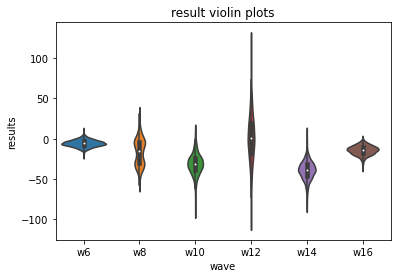

In [163]:
plotViolinResults()

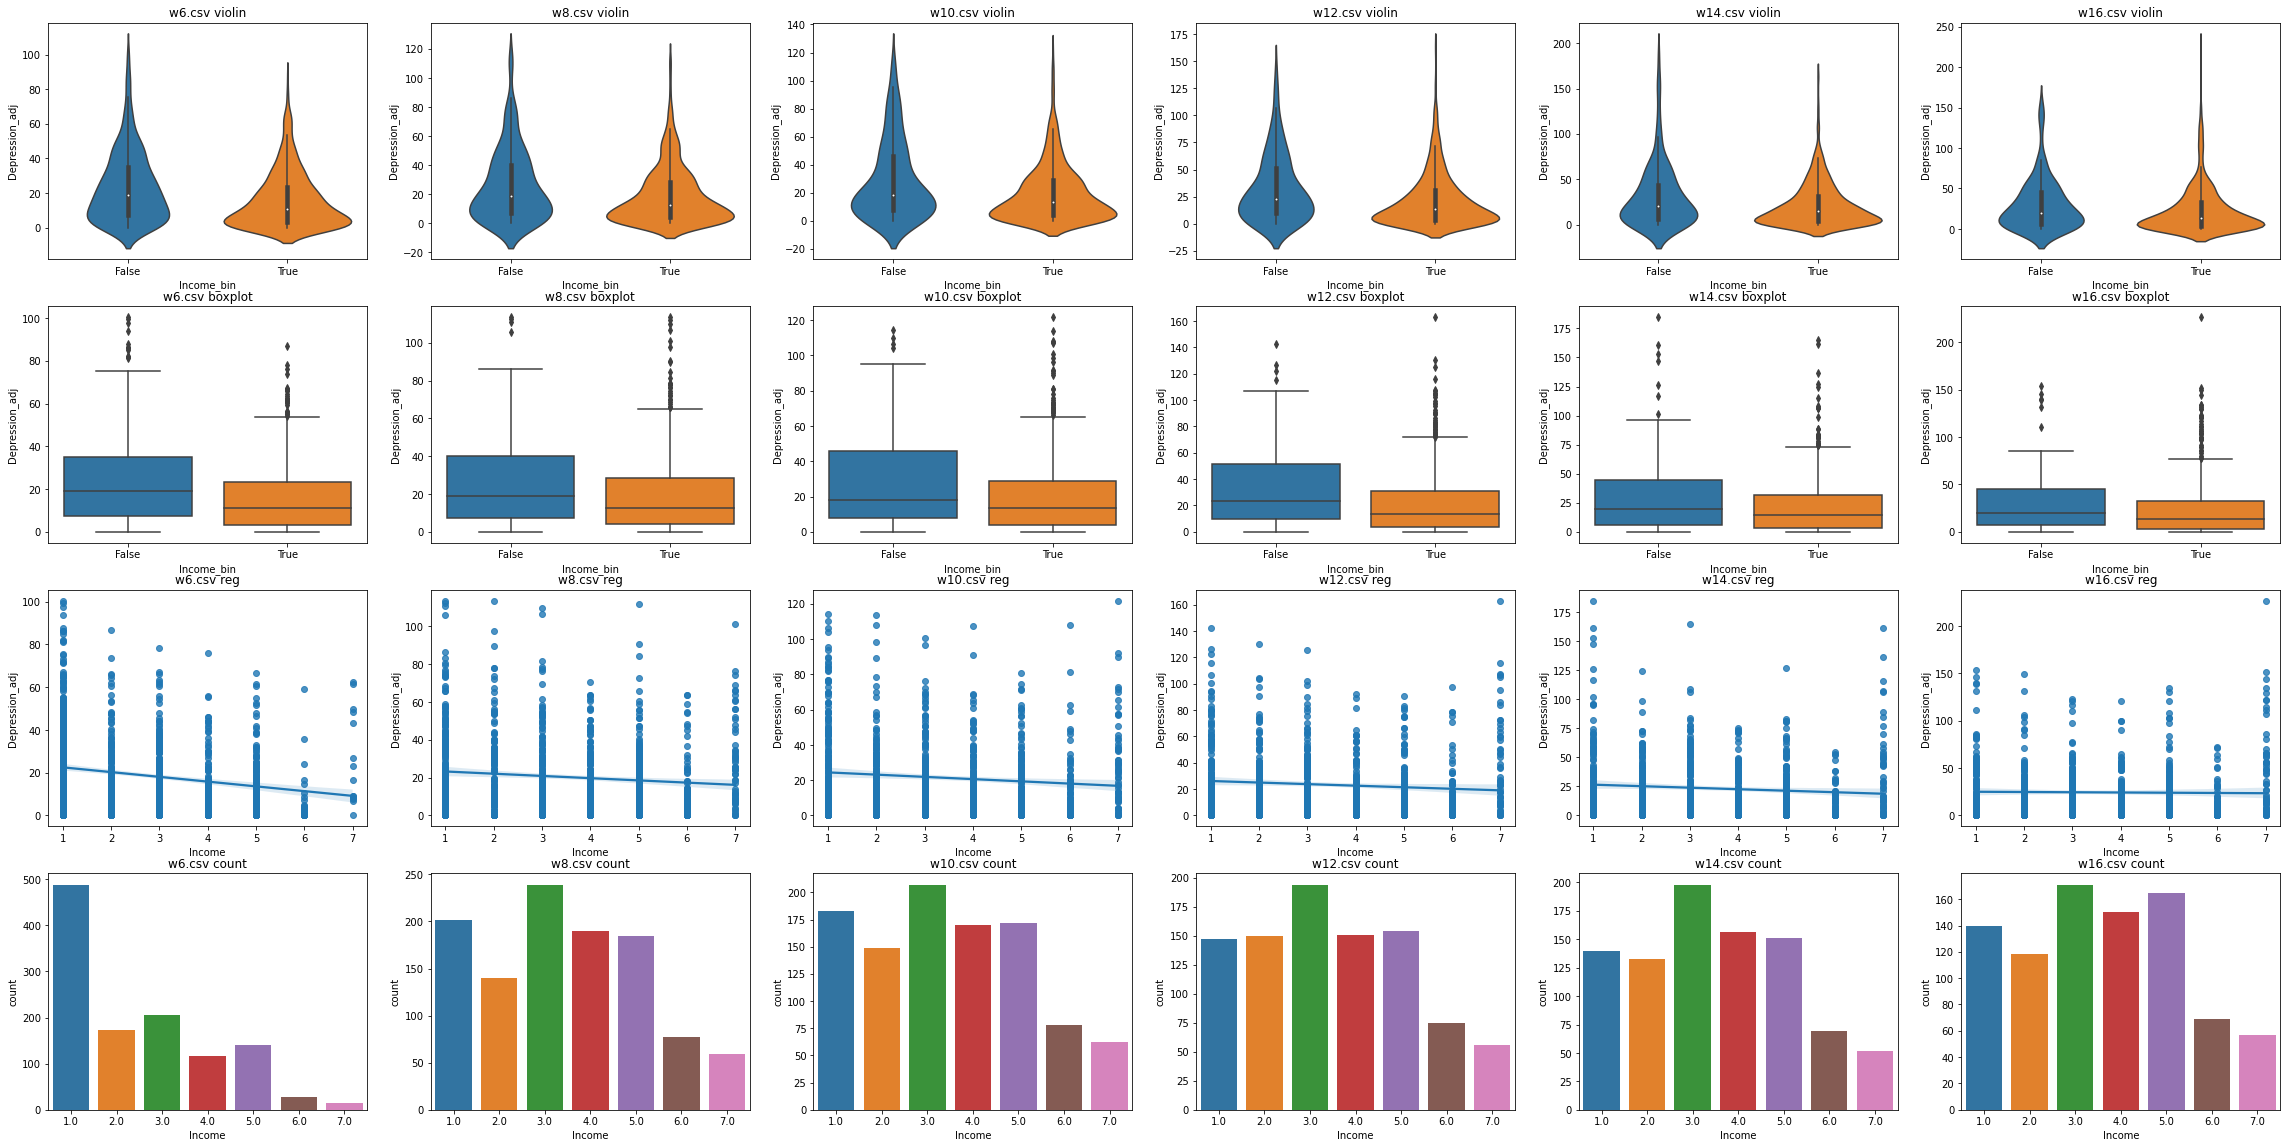

In [101]:
plot_vioboxes()

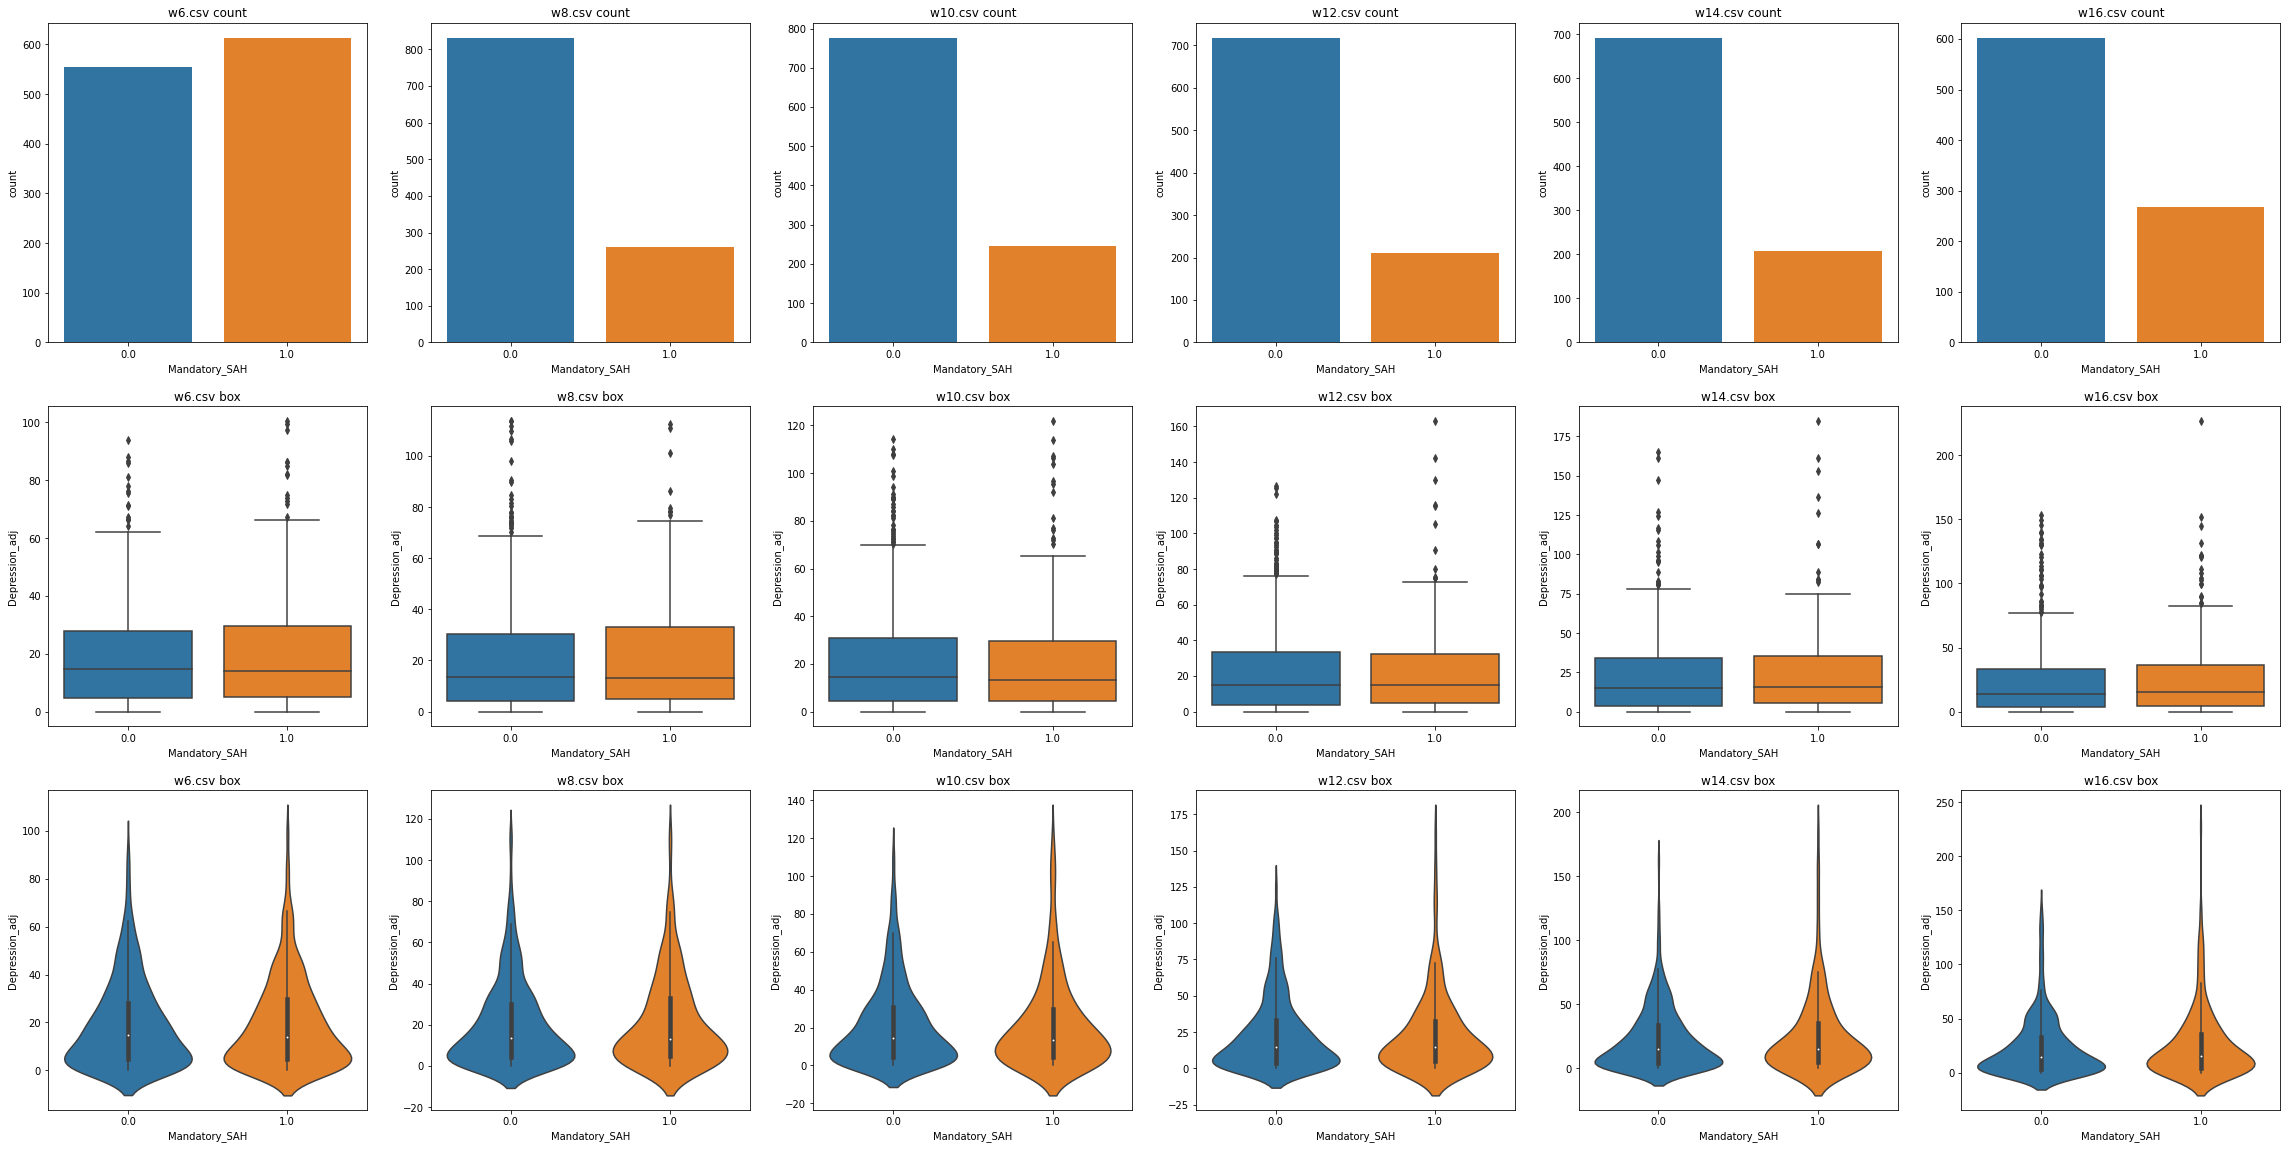

In [108]:
plotSAH()

In [111]:
data.columns

Index(['PROLIFIC_PID', 'Gender', 'Education', 'Income', 'Political_Views',
       'Age', 'Race', 'Depression', 'Stress', 'Anxiety', 'Fear_COVID',
       'Emotional_Support', 'Loneliness', 'slope_new_cases',
       'slope_new_deaths', 'GatheringStrictness', 'Mandatory_business_closure',
       'Mandatory_PPE_masks', 'gatherBan_order_code', 'Mandatory_SAH',
       'stayHome_order_code', 'cvd_cases_7d_avg', 'cvd_deaths_7d_avg',
       'more_than_1_attQ_failed', 'string_outlier_core',
       'response_consistency', 'wave', 'RW1_8', 'Race_AA', 'Race_W',
       'low_quality', 'Income^2', 'Age^2', 'Education^2', 'low_quality_w',
       'dropout', 'dropout_w', 'total_w', 'Depression_adj'],
      dtype='object')

In [144]:
def inspectPair(filename, hue="Mandatory_SAH"):
    data = pd.read_csv(os.path.join(data_path, filename))
    subset = data[["Education", 
                  "Income", 
                  "Political_Views", 
                  "Depression_adj", 
                  "Stress", 
                  "Anxiety", 
                  "Loneliness", 
                  "cvd_cases_7d_avg",
                  "cvd_deaths_7d_avg",
                  "Mandatory_SAH"]]
    sns.pairplot(subset, hue=hue, corner=True, kind='reg')

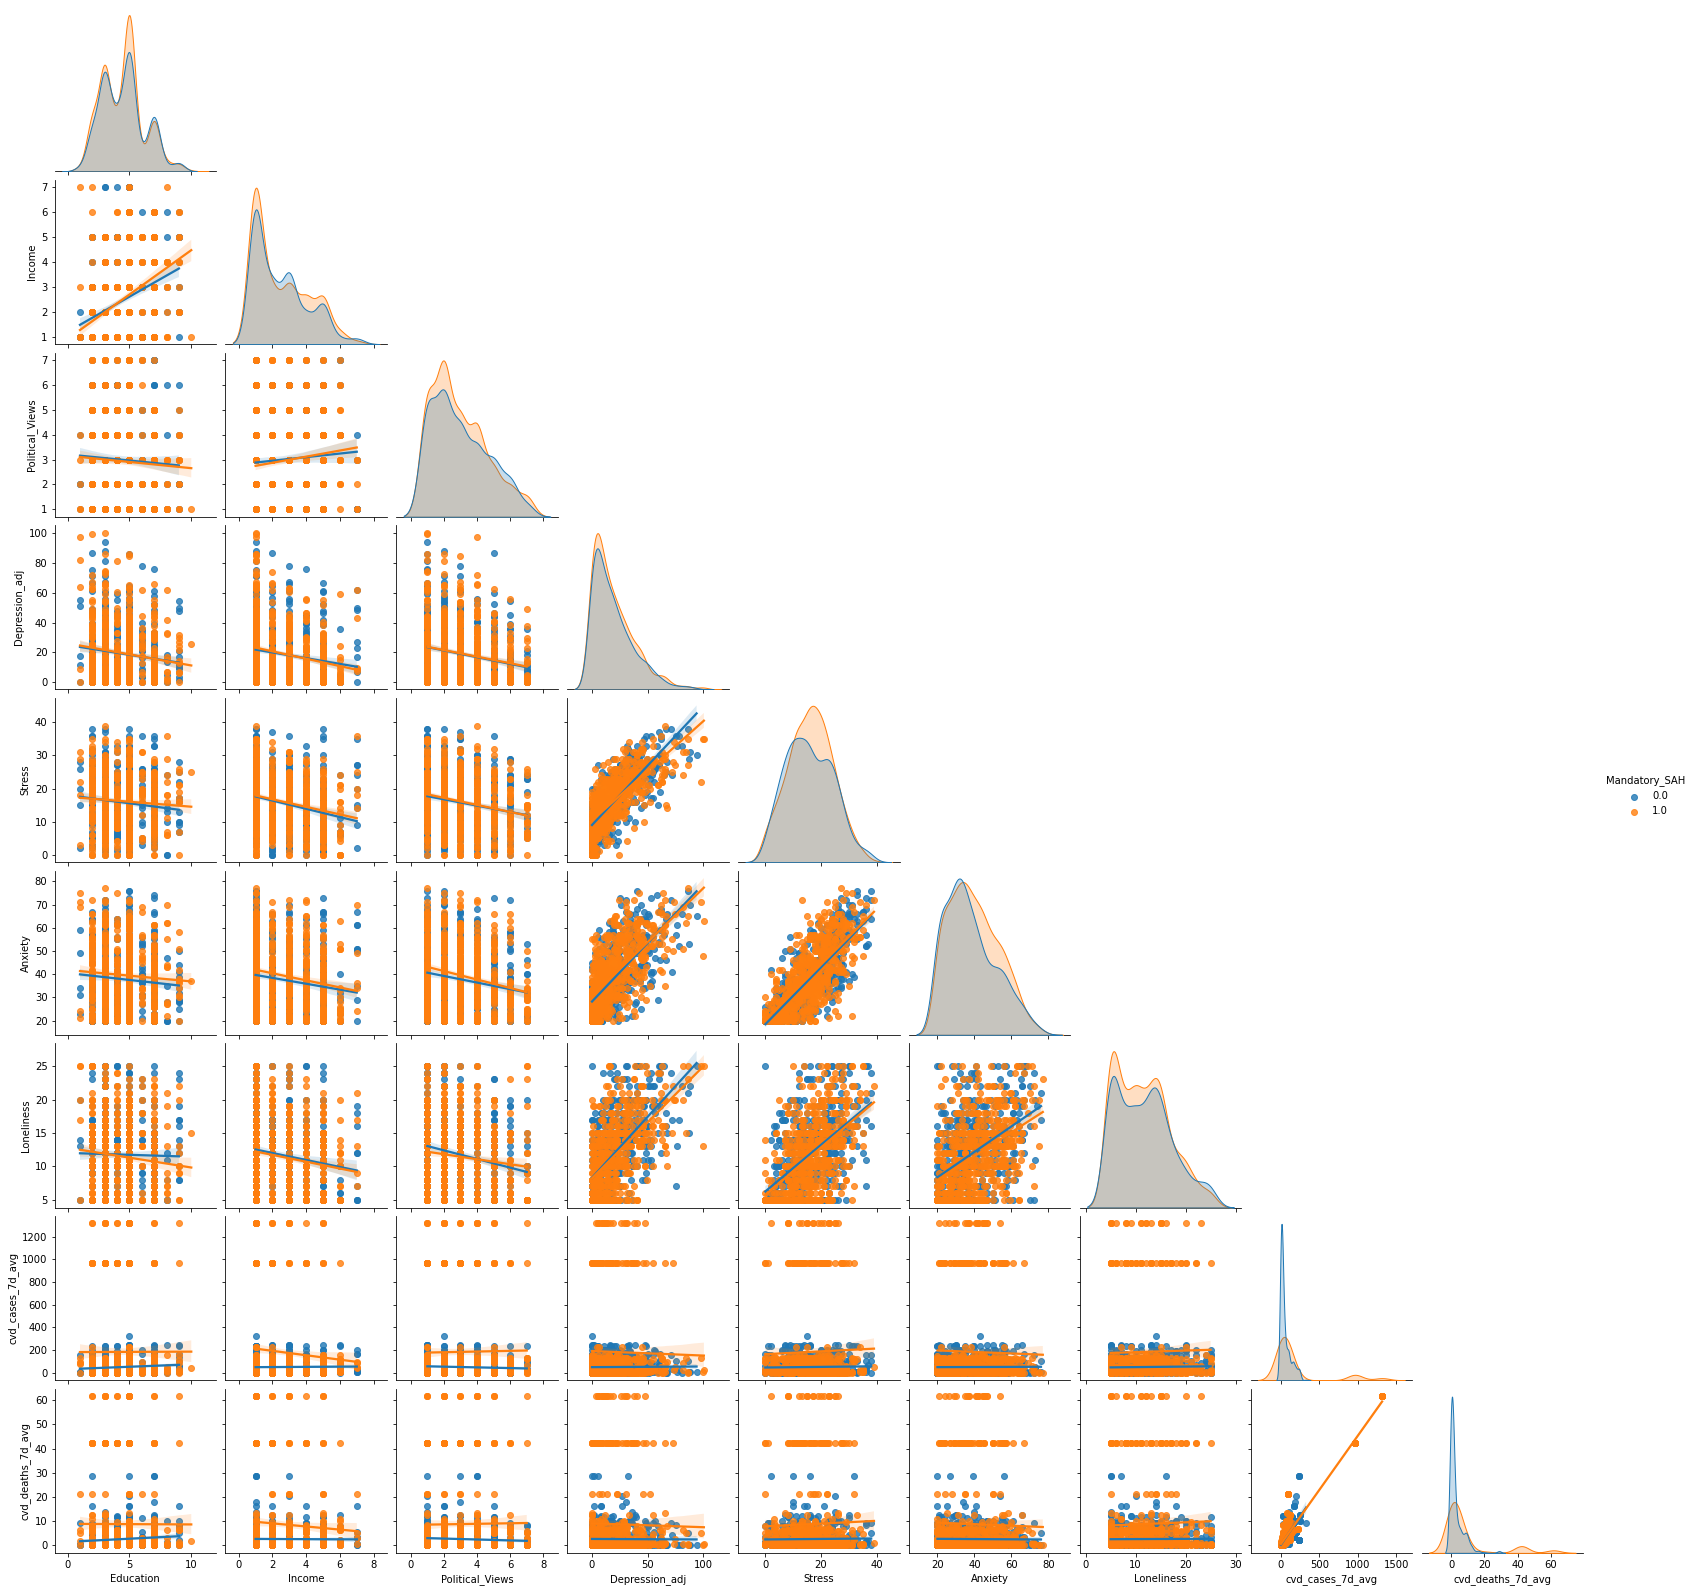

In [145]:
inspectPair("w6.csv")

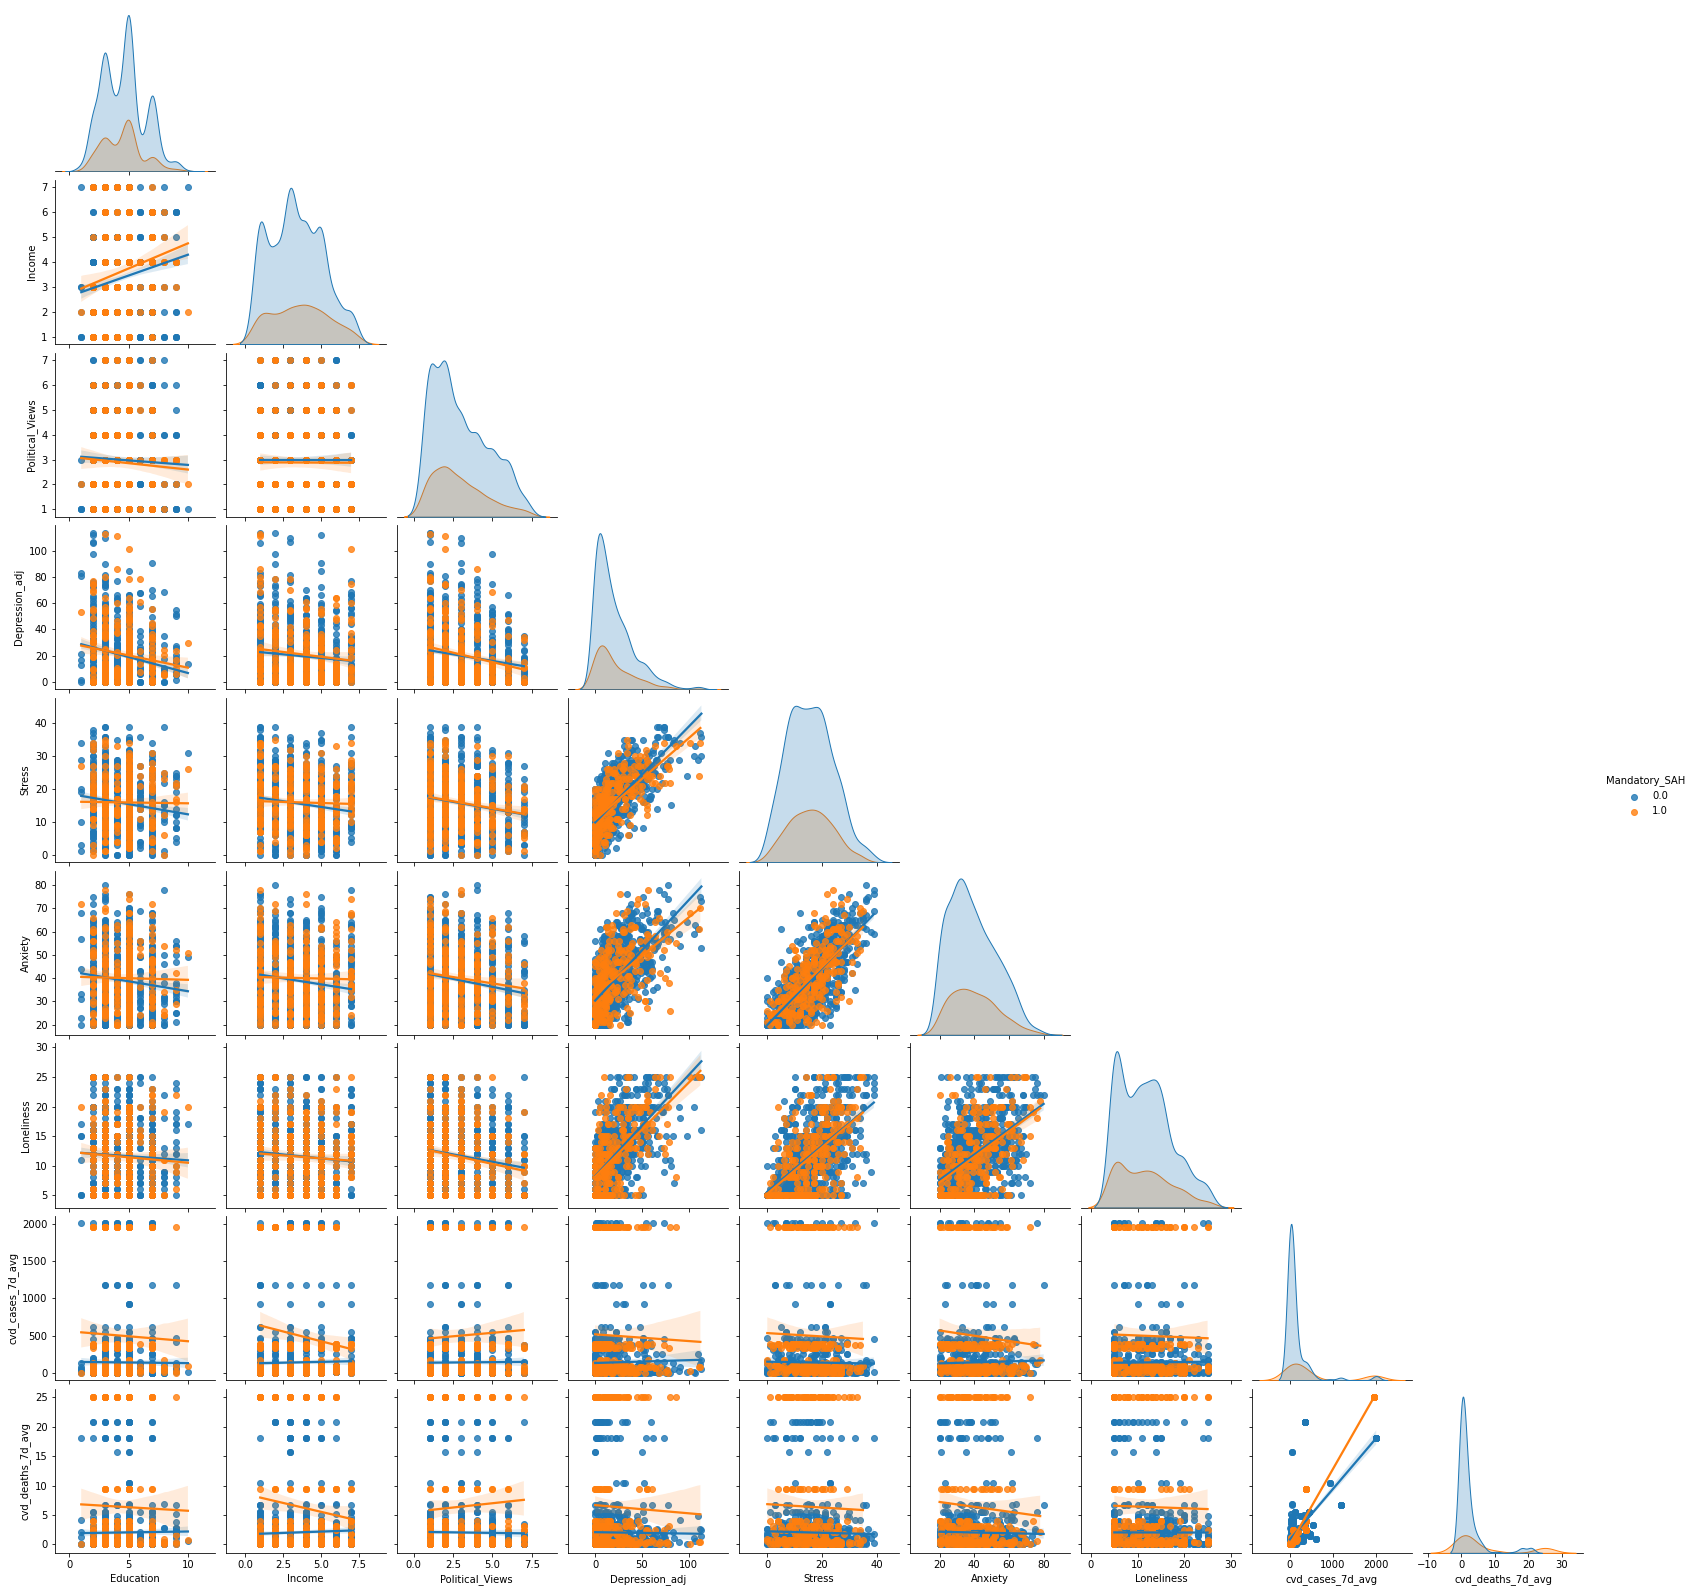

In [146]:
inspectPair("w8.csv")

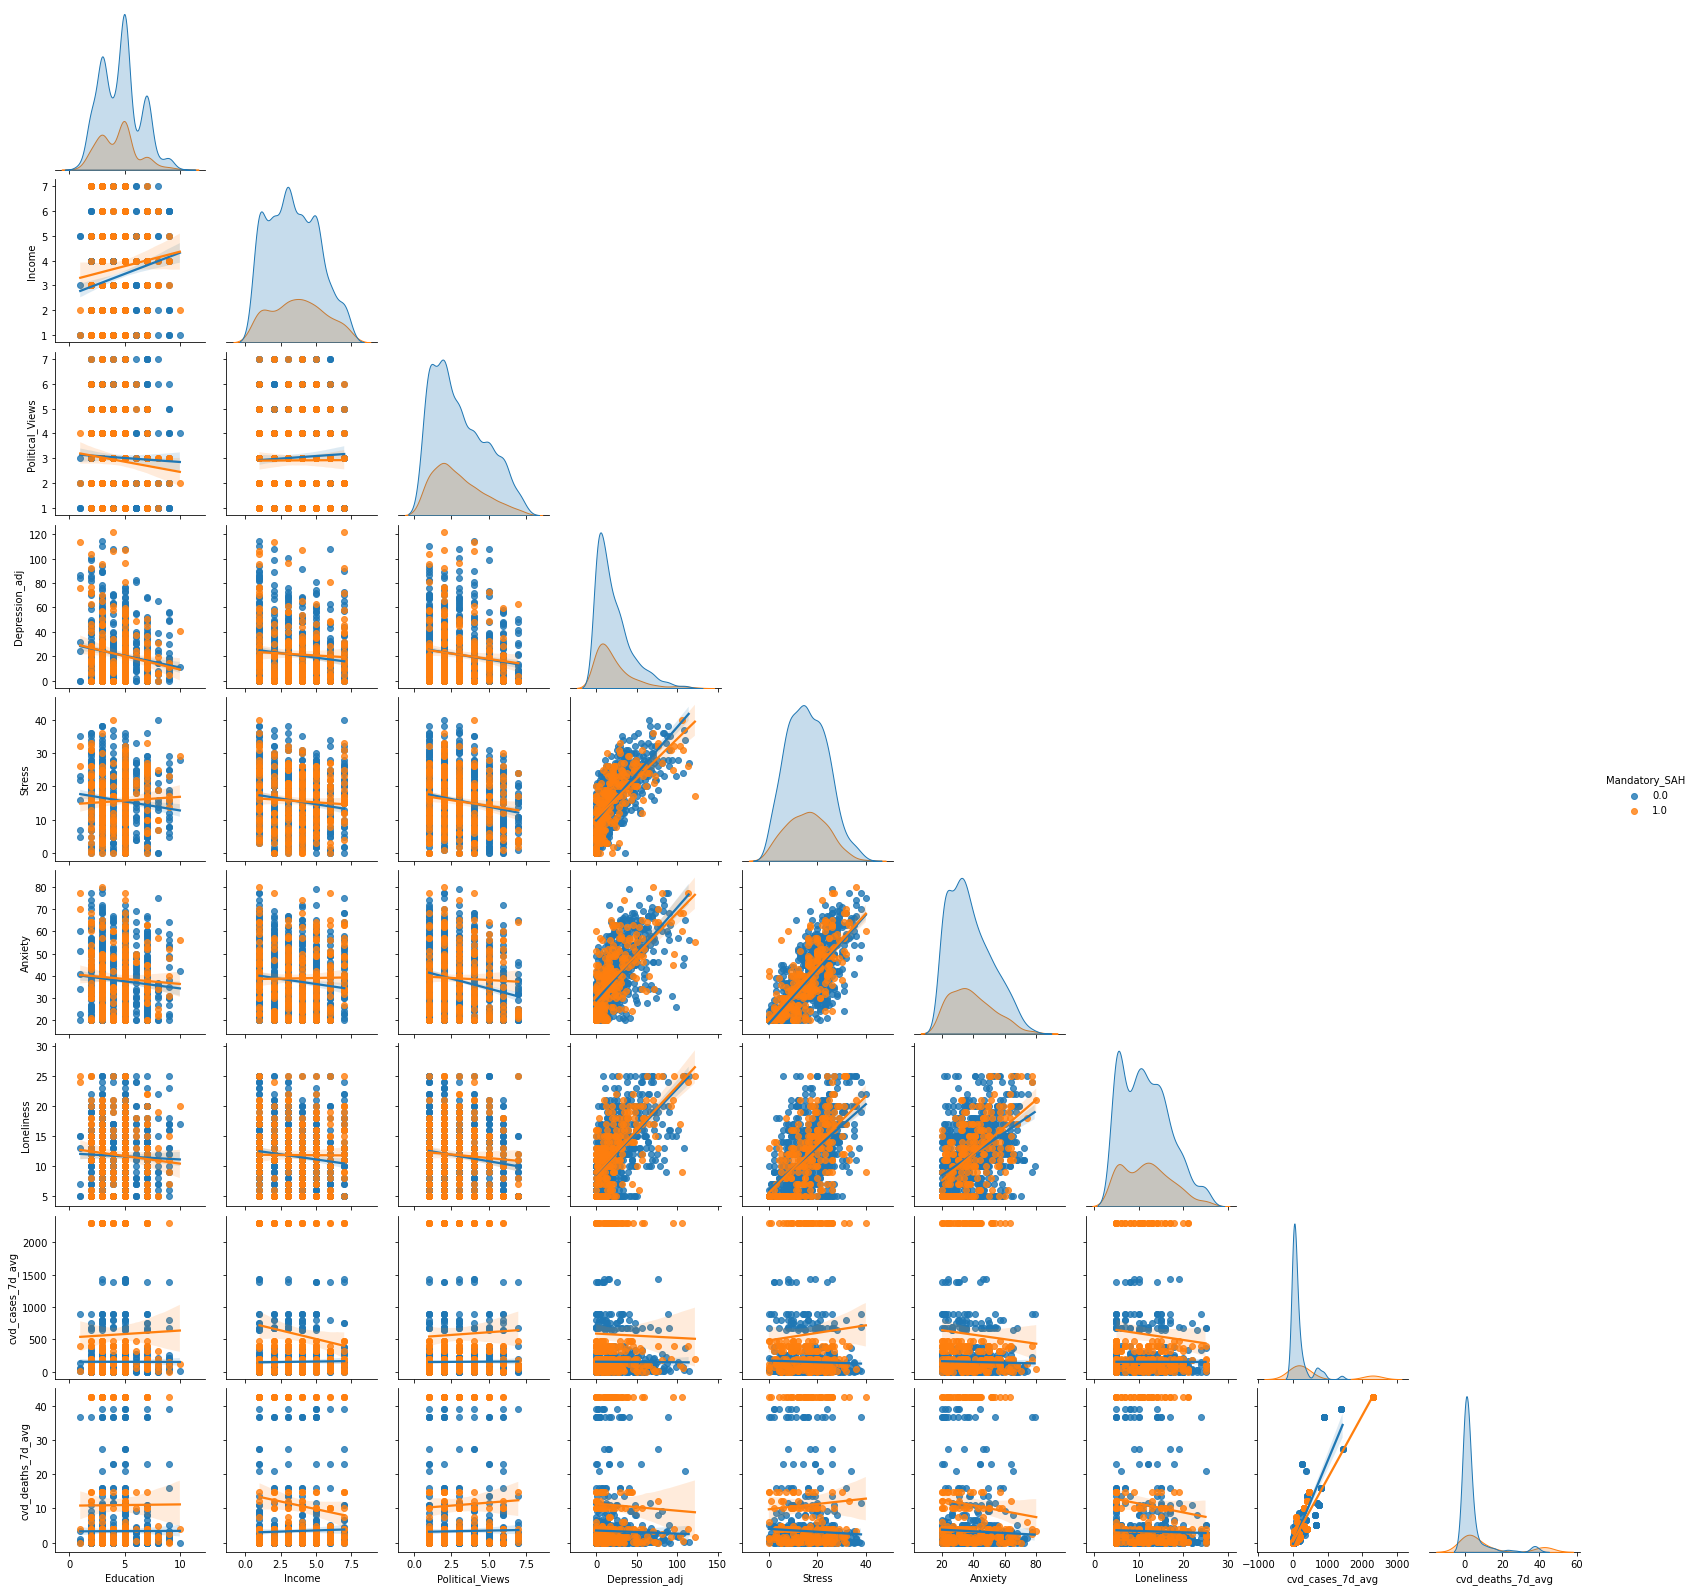

In [147]:
inspectPair("w10.csv")

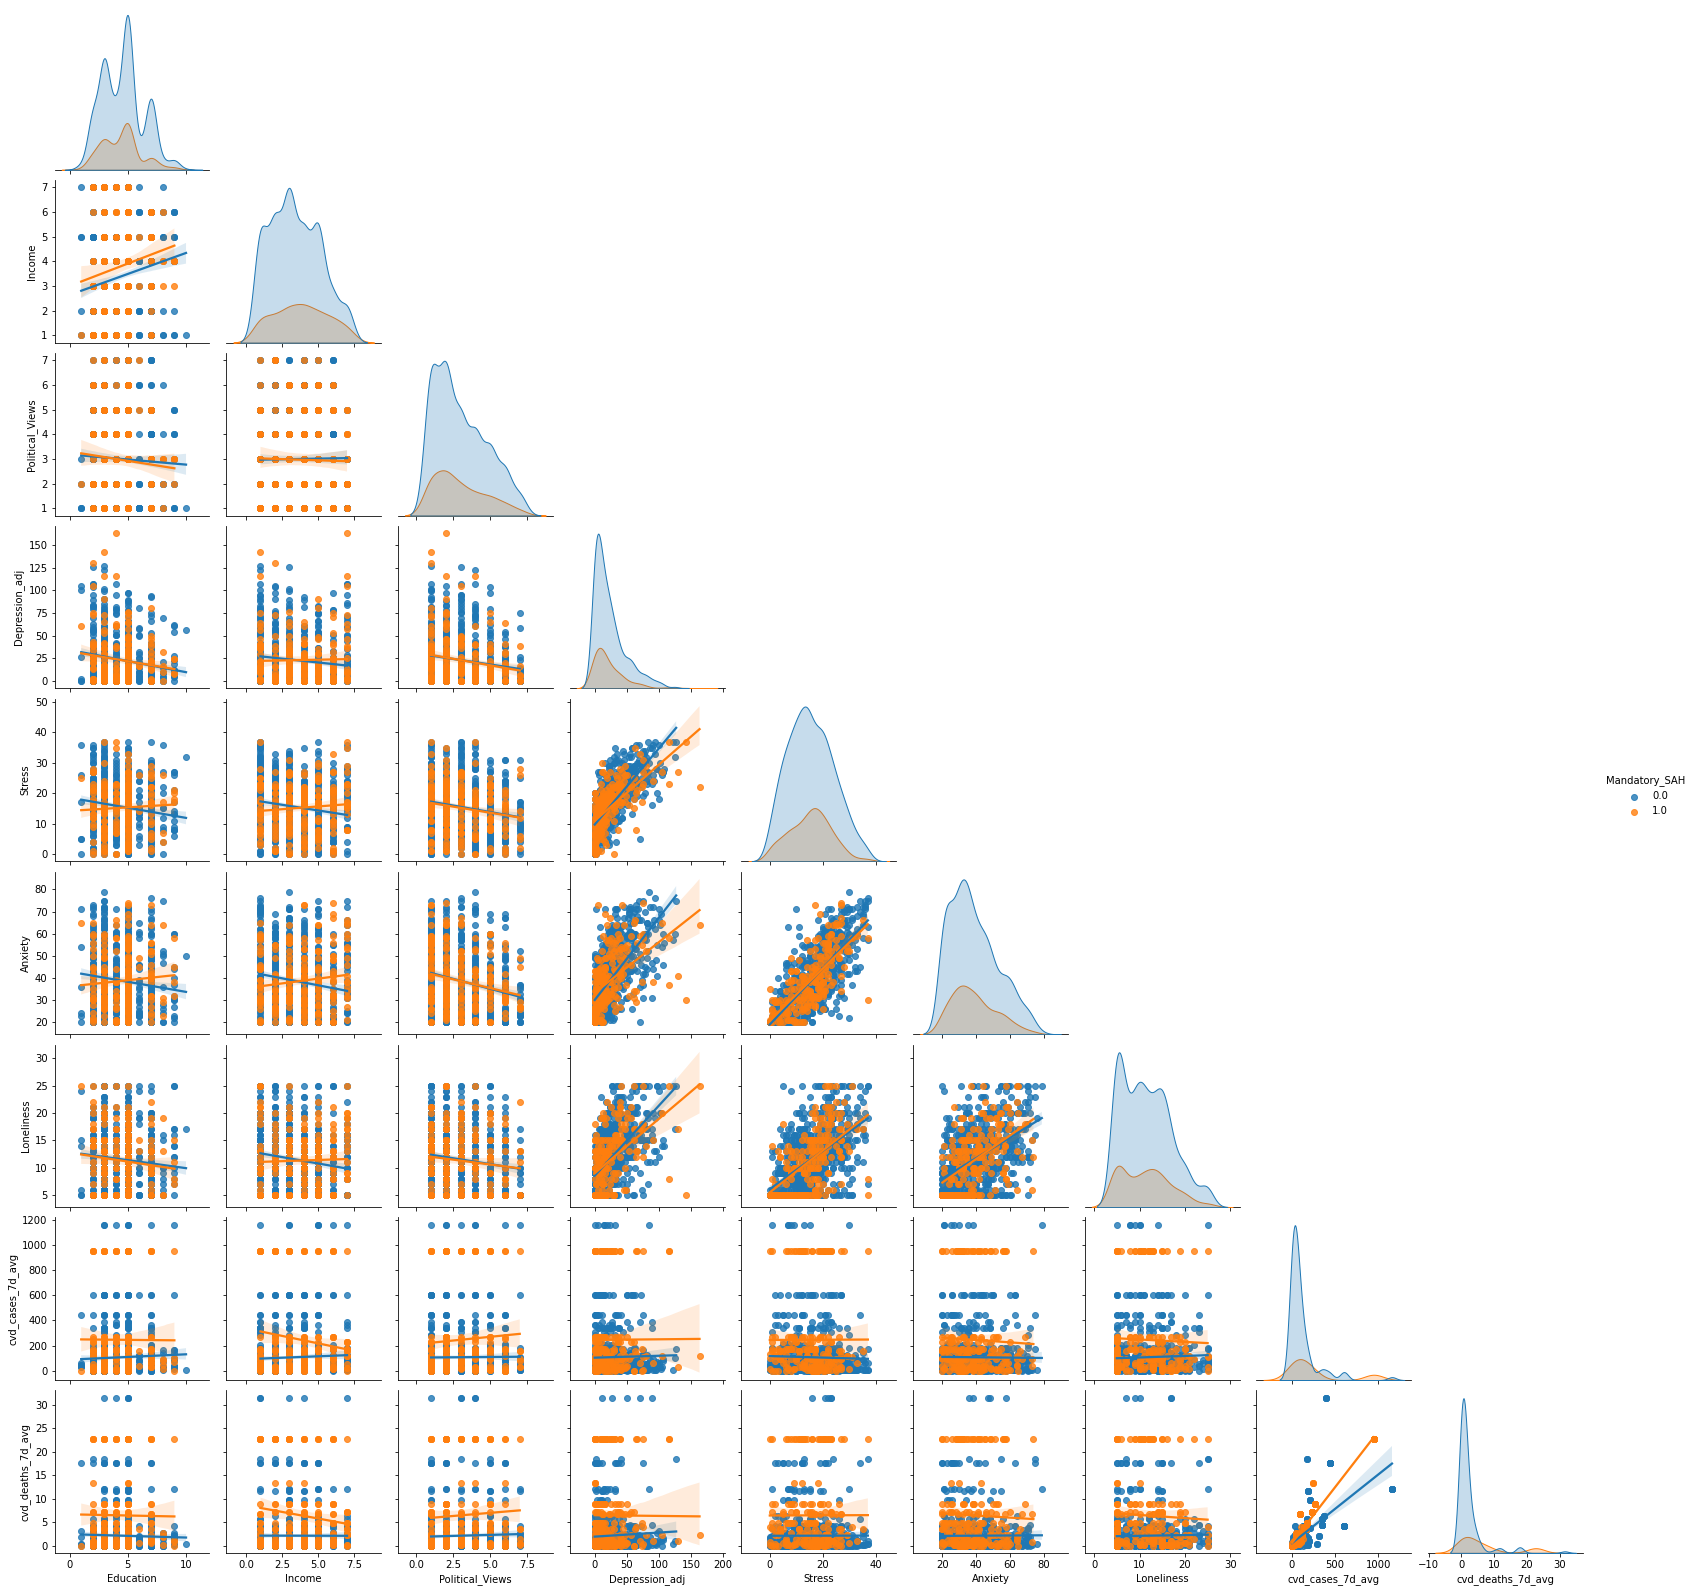

In [148]:
inspectPair("w12.csv")

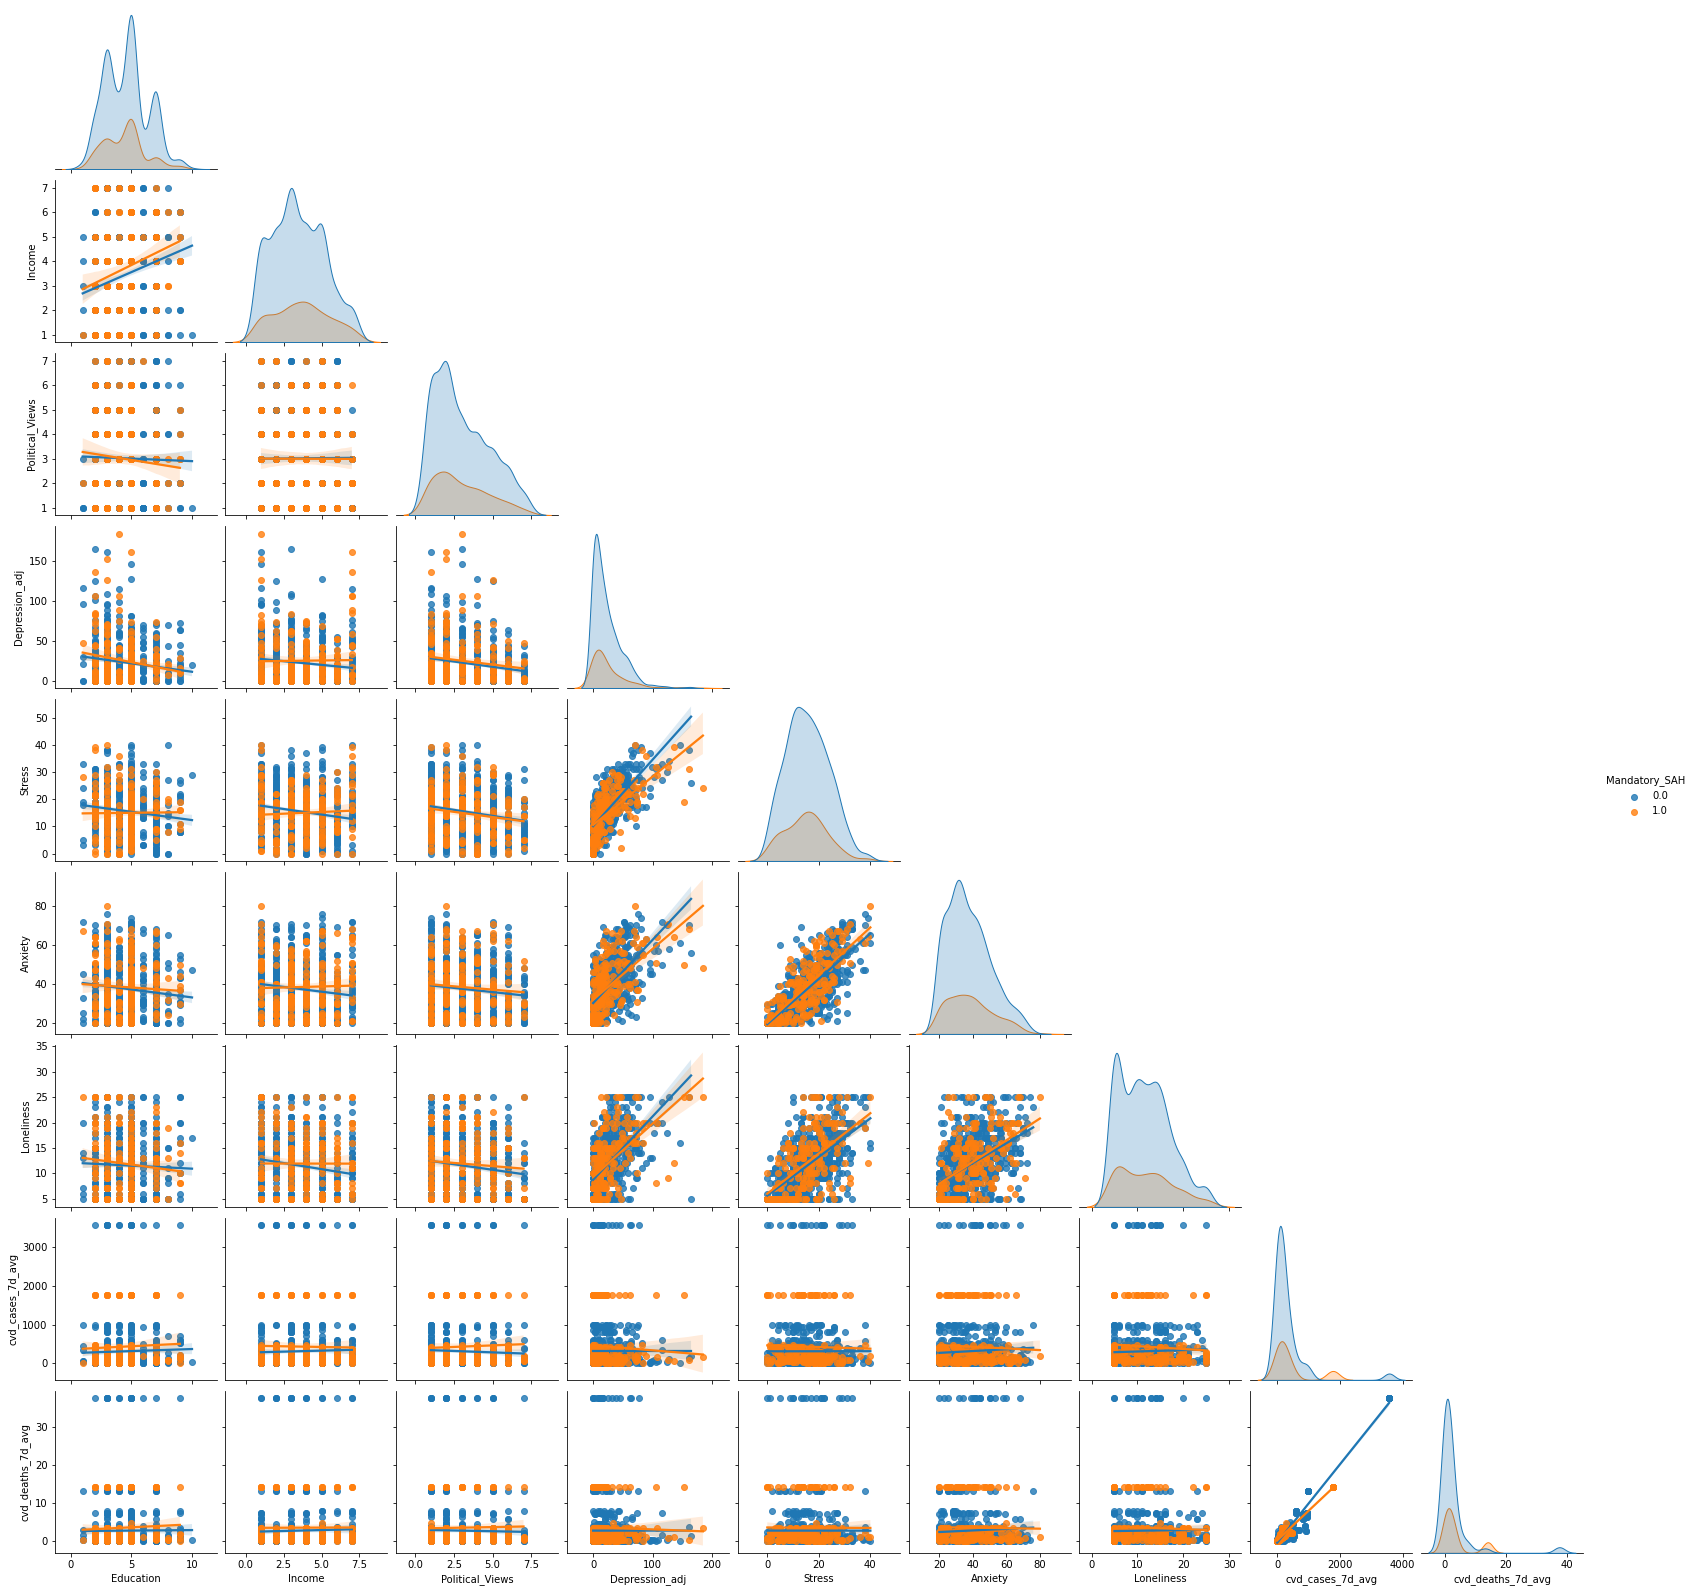

In [149]:
inspectPair("w14.csv")

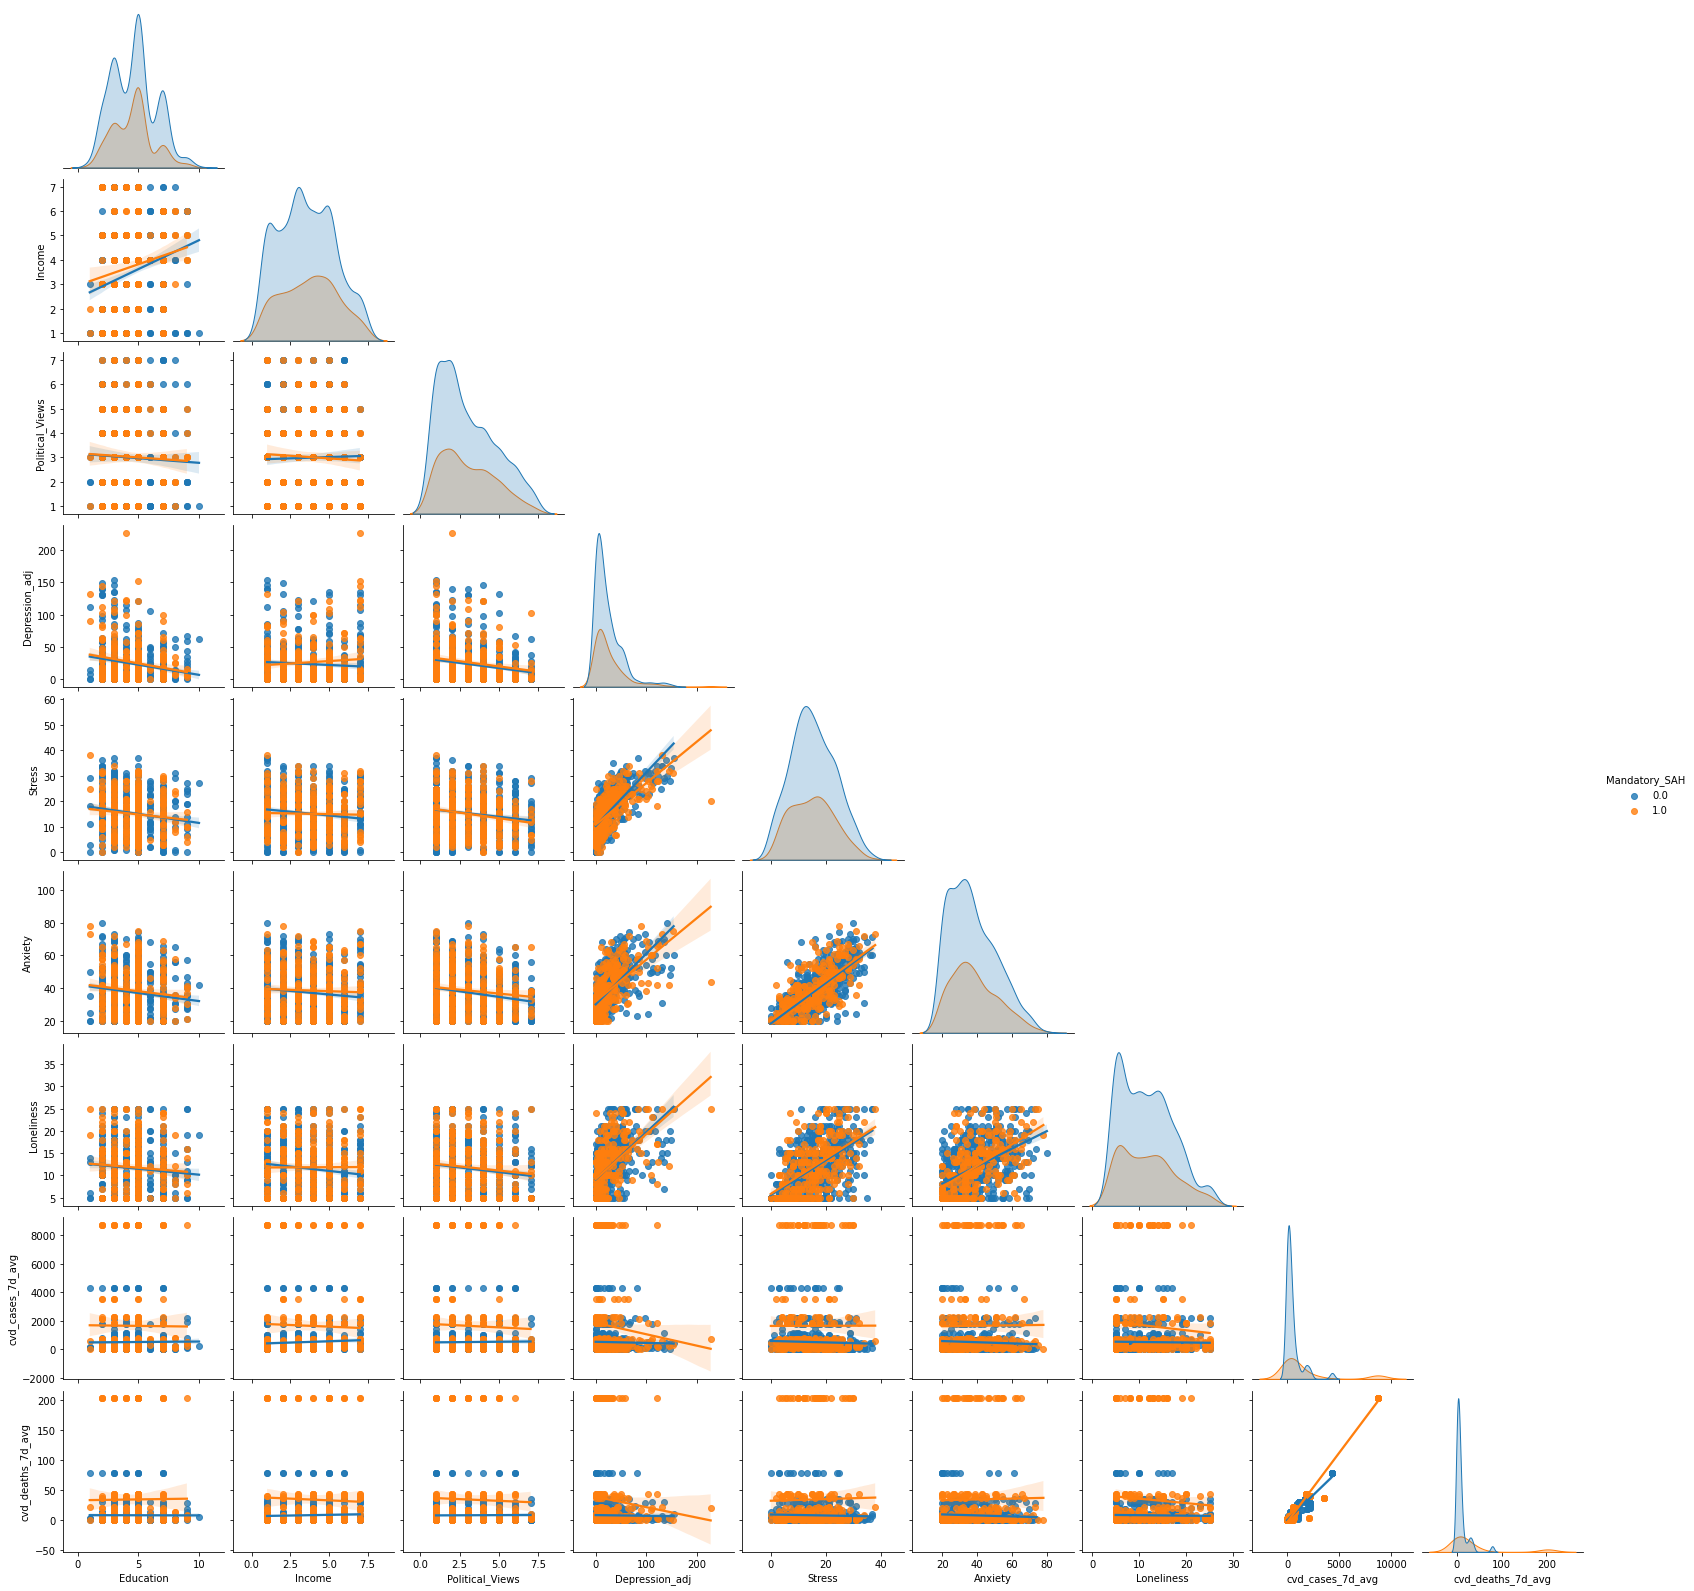

In [150]:
inspectPair("w16.csv")